<a href="https://colab.research.google.com/github/Saimani5454/logistic_regression_assignment/blob/main/Logistic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

# Explore features and summary statistics
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

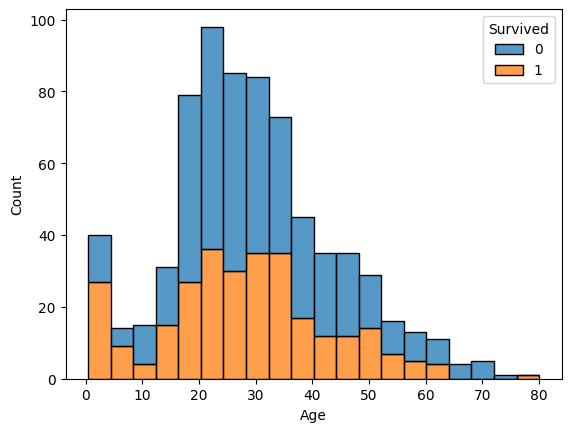

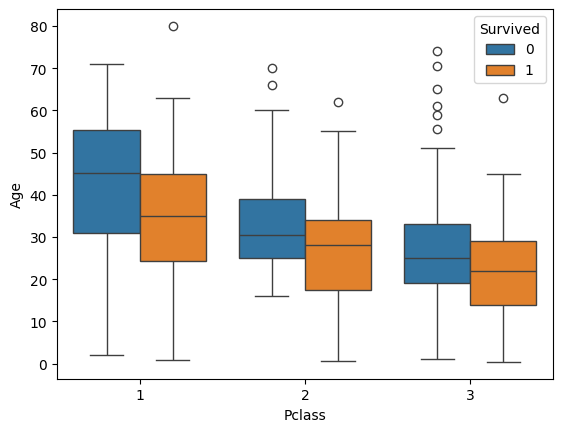

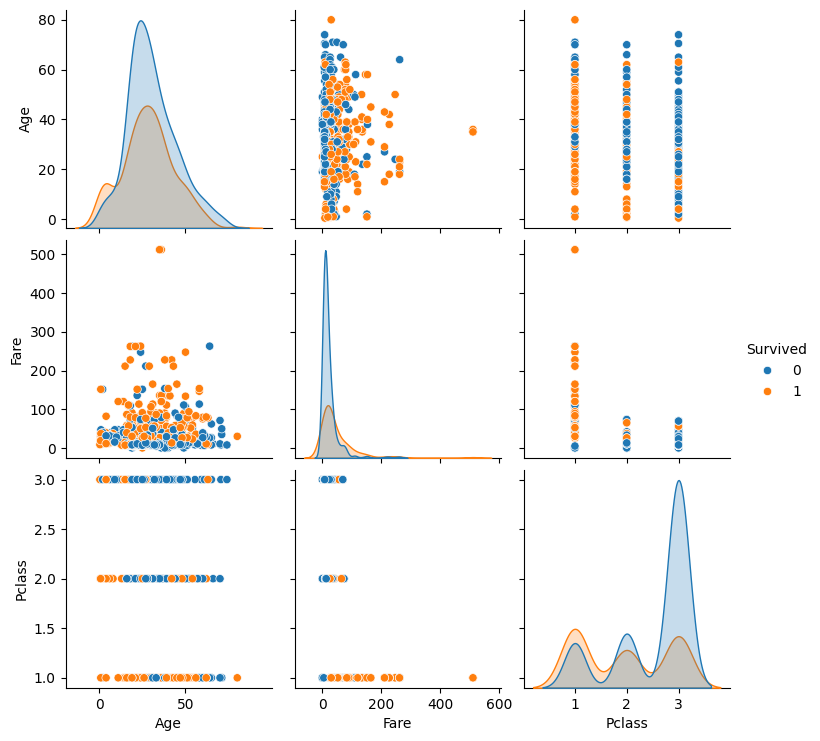

In [ ]:
# Visualizations
sns.histplot(data=train, x="Age", hue="Survived", multiple="stack")
plt.show()

sns.boxplot(data=train, x="Pclass", y="Age", hue="Survived")
plt.show()

# Pair plot for numeric features
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue="Survived")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example preprocessing for train data (similar for test)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train[features]
y_train = train['Survived']
X_train

(     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0         3    male  22.0      1      0   7.2500        S
 1         1  female  38.0      1      0  71.2833        C
 2         3  female  26.0      0      0   7.9250        S
 3         1  female  35.0      1      0  53.1000        S
 4         3    male  35.0      0      0   8.0500        S
 ..      ...     ...   ...    ...    ...      ...      ...
 886       2    male  27.0      0      0  13.0000        S
 887       1  female  19.0      0      0  30.0000        S
 888       3  female   NaN      1      2  23.4500        S
 889       1    male  26.0      0      0  30.0000        C
 890       3    male  32.0      0      0   7.7500        Q
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
# Preprocessing pipeline
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [ ]:
cat_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_train_preprocessed

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data (if not already done)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_preprocessed, train['Survived'], test_size=0.2, random_state=42
)

# Build and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))


Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-score: 0.7464788732394366
ROC-AUC: 0.8763191763191763


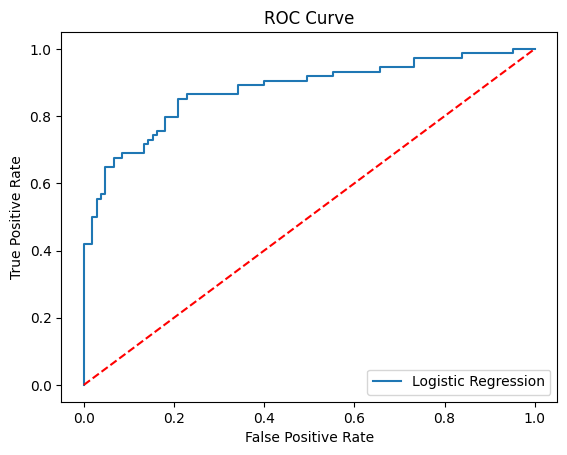

In [ ]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr,label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
import numpy as np

# Get feature names after one-hot encoding
cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_names])

# Show coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df.sort_values(by='Coefficient', ascending=False))

       Feature  Coefficient
7   Sex_female     1.318693
4     Pclass_1     0.733064
5     Pclass_2     0.243503
9   Embarked_C     0.210304
10  Embarked_Q     0.051107
3         Fare     0.003673
0          Age    -0.029065
2        Parch    -0.130215
11  Embarked_S    -0.263755
1        SibSp    -0.292766
6     Pclass_3    -0.978911
8     Sex_male    -1.321037


In [ ]:
# prompt: 6. Deployment with Streamlit:
# In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.
# (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
# Detailed deployment instructions are available in the Streamlit Documentation.

import pandas as pd
!pip install streamlit

import streamlit as st
import pickle

# Save the trained model and preprocessor
with open('model_preprocessor.pkl', 'wb') as f:
    pickle.dump({'model': model, 'preprocessor': preprocessor}, f)

st.title("Titanic Survival Prediction")

st.write("Enter the passenger's details to predict survival.")

# Create input fields
pclass = st.selectbox("Pclass", [1, 2, 3])
sex = st.selectbox("Sex", ['male', 'female'])
age = st.slider("Age", 0, 100, 30)
sibsp = st.slider("SibSp", 0, 8, 0)
parch = st.slider("Parch", 0, 6, 0)
fare = st.number_input("Fare", value=30.0)
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])

# Create a dictionary from user inputs
input_data = {
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked
}

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Load the saved model and preprocessor
with open('model_preprocessor.pkl', 'rb') as f:
    saved_objects = pickle.load(f)
    loaded_model = saved_objects['model']
    loaded_preprocessor = saved_objects['preprocessor']


if st.button("Predict Survival"):
    # Preprocess the input data
    processed_input = loaded_preprocessor.transform(input_df)

    # Make prediction
    prediction = loaded_model.predict(processed_input)
    prediction_proba = loaded_model.predict_proba(processed_input)[:, 1]

    if prediction[0] == 1:
        st.success(f"Predicted Survival: Yes (Probability: {prediction_proba[0]:.2f})")
    else:
        st.error(f"Predicted Survival: No (Probability: {prediction_proba[0]:.2f})")



2025-06-30 19:10:29.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-30 19:10:29.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# In the context of classification, especially binary classification:

# Precision answers: Of all the instances predicted as positive, how many were actually positive?
# It is calculated as: True Positives / (True Positives + False Positives)
# High precision means a low false positive rate.

# Recall answers: Of all the actual positive instances, how many were correctly predicted as positive?
# It is calculated as: True Positives / (True Positives + False Negatives)
# High recall means a low false negative rate.

# The file already uses `sklearn.metrics.precision_score` and `sklearn.metrics.recall_score`
# to calculate these metrics for the logistic regression model on the validation set.

In [ ]:
# Cross-validation is a technique used to evaluate the performance of a machine learning model on an independent dataset.
# It involves splitting the dataset into multiple folds (e.g., k-folds).
# The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold serving as the validation set exactly once.
# The performance metric (e.g., accuracy, precision, recall) is then averaged across all k folds to get a more robust estimate of the model's performance.

# Importance in Binary Classification:
# 1. Reducing Overfitting: It helps to assess if the model generalizes well to unseen data by evaluating it on different subsets of the dataset.
# 2. More Reliable Performance Estimate: A single train-test split can lead to a performance estimate that is highly dependent on how the data was split. Cross-validation provides a more reliable estimate by averaging performance across multiple splits.
# 3. Using All Data for Training and Evaluation: In cross-validation, every data point is used for both training and evaluation, which can be beneficial for smaller datasets.
# 4. Hyperparameter Tuning: Cross-validation is often used to tune hyperparameters. The hyperparameters that result in the best average performance across the folds are selected.
